<a href="https://colab.research.google.com/github/shashankshekhar28/sms-spam-classifier/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='cp1252')
df.sample(5)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
342,ham,Where u been hiding stranger?,NaN,NaN,NaN
4937,ham,No it was cancelled yeah baby! Well that sound...,NaN,NaN,NaN
4170,ham,Pls what's the full name of joke's school cos ...,NaN,NaN,NaN
1934,ham,Hope you are having a great day.,NaN,NaN,NaN
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...,NaN,NaN,NaN


In [2]:
df.shape


(5572, 5)

In [3]:
#what we are going to do
#1)data cleaning
#2)Eda
#3)text preprocessing
#4)model training
#5)evaluation
#6)improvements
#7) making a website
#8)deployment

In [4]:
#DATA CLEANING
df.info()
#info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#as last 3 coulums or features have many null values
df.drop(columns=['Unnamed: 3'],inplace=True)
#already removed other columns
df


,v1,v2,Unnamed: 2,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 4
4162,ham,I told that am coming on wednesday.,NaN,NaN
4678,ham,Sry da..jst nw only i came to home..,NaN,NaN
2781,ham,Then its most likely called Mittelschmertz. Go...,NaN,NaN
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...,NaN,NaN
4653,ham,Hope you are having a great day.,NaN,NaN


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#for labeling ham and spam as 0 and 1

In [8]:
df['target']=encoder.fit_transform(df['target'])
#for replacing values in column target with 0(ham) and 1(spam)

In [9]:
df.head(5)

,target,text,Unnamed: 2,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [10]:
#finding missing values in dataframe
df.isnull().sum()

,0
target,0
text,0
Unnamed: 2,5522
Unnamed: 4,5566


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5169, 4)

In [15]:
#EDA
df['target'].value_counts()

,count
target,
0,4516
1,653


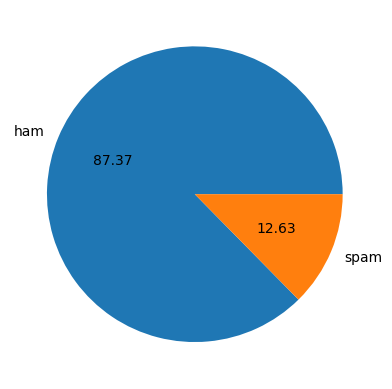

In [16]:
#ham is more than spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
#data is imbalanced

In [17]:
!pip install nltk
import nltk

In [18]:
#nltk dependency download
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
#making new coulumns
df.loc[:, 'num_char'] = df['text'].apply(len)
df.head()

/tmp/ipython-input-2650896703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_char'] = df['text'].apply(len)


,target,text,Unnamed: 2,Unnamed: 4,num_char
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,61


In [20]:
df.loc[:, 'num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

/tmp/ipython-input-3246283230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,Unnamed: 2,Unnamed: 4,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,61,15


In [21]:
df.loc[:, 'num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

/tmp/ipython-input-86332270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,Unnamed: 2,Unnamed: 4,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,61,15,1


In [22]:
df.head()


,target,text,Unnamed: 2,Unnamed: 4,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,61,15,1


In [23]:
df.iloc[:,2:6].describe()
#decribes mathematical calculations of the columns

,num_char,num_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [24]:
df[df['target']==0][['num_char','num_words','num_sentences']].describe()
#ham mathematucal data

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==1][['num_char','num_words','num_sentences']].describe()
#spam mathematical data

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

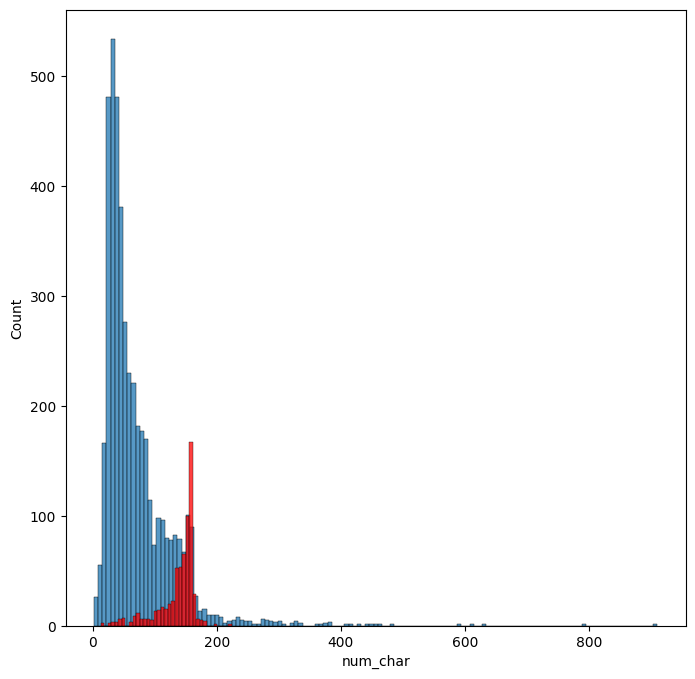

In [26]:
#more words or characters are in spam messages
#now plotting histograms for both ham and spam messages
import seaborn as sns
plt.figure(figsize=(8,8))
sns.histplot(df[df['target']==0]['num_char'])#count for ham char
sns.histplot(df[df['target']==1]['num_char'],color='red')#count for spam char

<Axes: xlabel='num_words', ylabel='Count'>

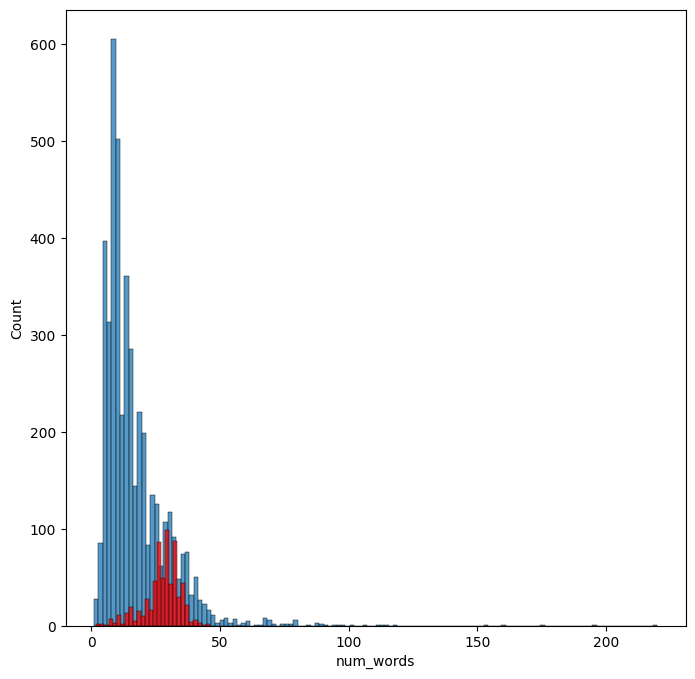

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

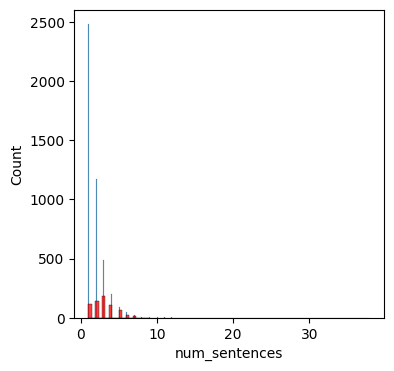

In [28]:
plt.figure(figsize=(4,4))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

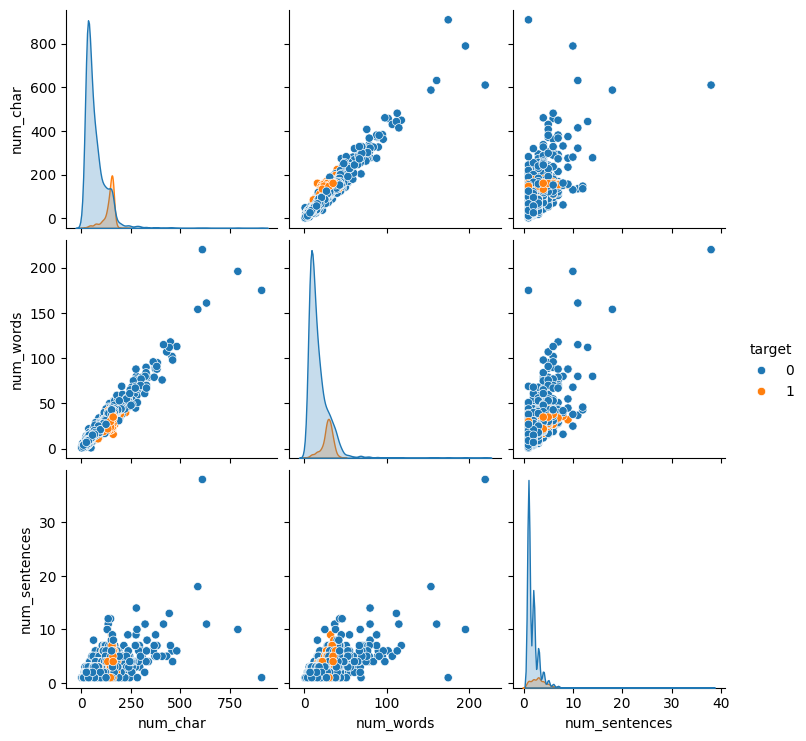

In [29]:
#to get relationship between diffrent columns ith each other
#we can use pairplot
sns.pairplot(df,hue='target')
#outliers in data

In [30]:
#df correlation table
df.corr(numeric_only=True)

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

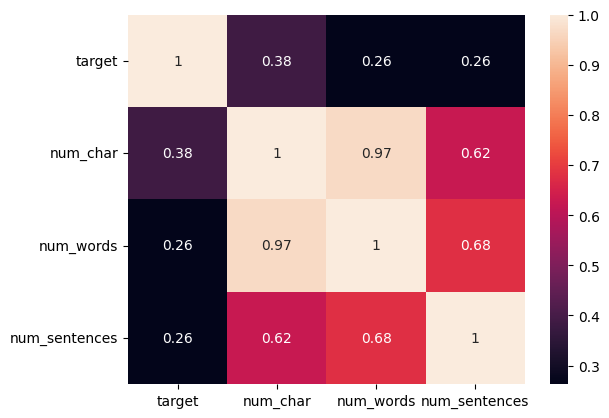

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [32]:
#DATA PREPROCESSING
#1)lower case
#2)tokenization
#3)removing special characters
#4)removing stop words and punctuations
#5)stemming-[loving-lov(e will be removed),machine-machin,dancing-danc]

In [33]:
#creating function do all these tasks as a whole
import string #need to import this library
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) #now this contains a list of words
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
a=stopwords.words('english')

#thier only role is to construct the sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer() #creating its object
ps.stem('dancing')


'danc'

In [36]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df.loc[:,'transformed_text']=df['text'].apply(transform_text)
df.sample(5)

/tmp/ipython-input-1736538702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'transformed_text']=df['text'].apply(transform_text)


,target,text,Unnamed: 2,Unnamed: 4,num_char,num_words,num_sentences,transformed_text
3022,0,You are a very very very very bad girl. Or lady.,NaN,NaN,48,13,2,bad girl ladi
1710,0,"(No promises on when though, haven't even gott...",NaN,NaN,60,14,1,promis though even gotten dinner yet
3972,0,"Night night, see you tomorrow",NaN,NaN,29,6,1,night night see tomorrow
4304,0,Yo come over carlos will be here soon,NaN,NaN,37,8,1,yo come carlo soon
4283,0,Yes. I come to nyc for audiitions and am tryin...,NaN,NaN,60,14,2,ye come nyc audiit tri reloc


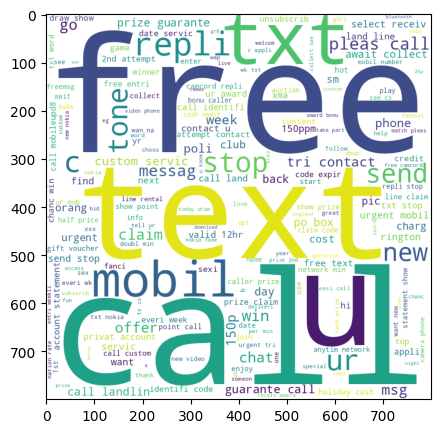

In [39]:
#now generating word cloud
#it will show words used mostlly in spam messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists to strings
spam_text = df[df['target'] == 1]['transformed_text']
spam_text = spam_text.str.cat(sep=" ")

# Generate word cloud
wc = WordCloud(width=800, height=800, background_color='white').generate(spam_text)

# Plot
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.show()


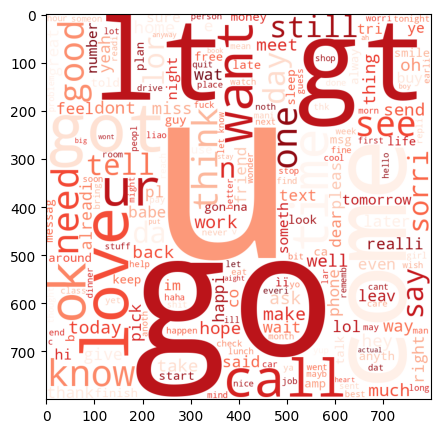

In [40]:
ham_text = df[df['target'] == 0]['transformed_text']

ham_text = ham_text.str.cat(sep=" ")

# Generate word cloud
wc = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(ham_text)

# Plot
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.show()


In [41]:
spam_corpus=[]
for msg in (df[df['target']==1]['transformed_text'].tolist() ):#gives list of all the messages as elements
    for word in msg.split():#splits each message into words and we put it into the list
        spam_corpus.append(word)




In [42]:
len(spam_corpus)

9939

In [43]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [44]:
spam_msg_count=pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_msg_count

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


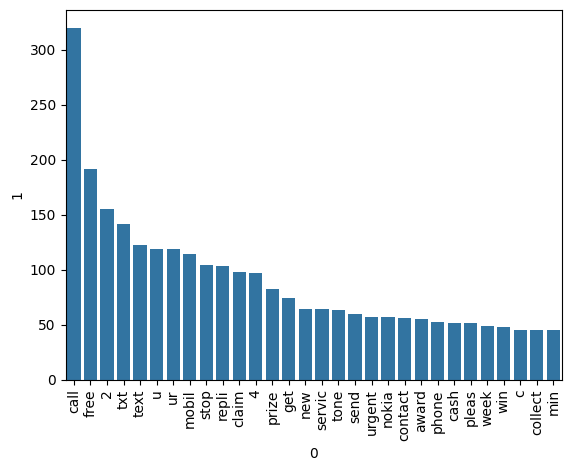

In [45]:
from collections import Counter
sns.barplot(x=spam_msg_count[0],y=spam_msg_count[1],data=spam_msg_count)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus=[]
for msg in (df[df['target']==0]['transformed_text'].tolist() ):#gives list of all the messages as elements
    for word in msg.split():#splits each message into words and we put it into the list
        ham_corpus.append(word)
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [47]:
len(ham_corpus)

35404

In [48]:
ham_msg_count=pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_msg_count

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


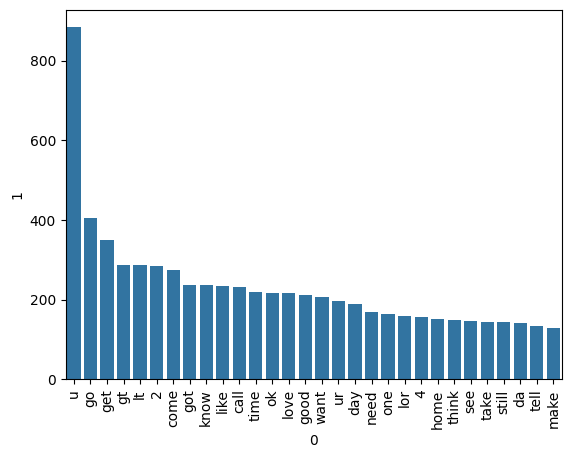

In [49]:
from collections import Counter
sns.barplot(x=ham_msg_count[0],y=ham_msg_count[1],data=ham_msg_count)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
#MODEL TRAINING
#USUALLY NB IS GOOD WITH TEXTUALUAL DATA BUT WE ARE GOING TO CHECK OTHER ALGO ALSO
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
'''1. CountVectorizer

It counts how many times each word appears in a document.

Output is a document-term matrix where each entry is the raw frequency of a word.

Example:

Document 1: "dog barks"
Document 2: "dog runs fast"


Count matrix:

word  doc1	doc2
dog	    1	1
barks	1	0
runs	0	1
fast	0	1'''

'1. CountVectorizer\n\nIt counts how many times each word appears in a document.\n\nOutput is a document-term matrix where each entry is the raw frequency of a word.\n\nExample:\n\nDocument 1: "dog barks"\nDocument 2: "dog runs fast"\n\n\nCount matrix:\n\nword  doc1\tdoc2\ndog\t    1\t1\nbarks\t1\t0\nruns\t0\t1\nfast\t0\t1'

In [52]:
x.shape

(5169, 6708)

In [53]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
'''Structure of a Confusion Matrix (for binary classification)
	                Predicted Positive	Predicted Negative
Actual Positive	    True Positive (TP)	False Negative (FN)
Actual Negative	    False Positive (FP)	True Negative (TN)'''

gnb.fit(x_train,y_train)
y_pred2=gnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))



accuracy score:  0.8800773694390716
confusion matrix: 
 [[792 104]
 [ 20 118]]
precision score:  0.5315315315315315


In [57]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

accuracy score:  0.9642166344294004
confusion matrix: 
 [[871  25]
 [ 12 126]]
precision score:  0.8344370860927153


In [58]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

accuracy score:  0.9700193423597679
confusion matrix: 
 [[893   3]
 [ 28 110]]
precision score:  0.9734513274336283


In [59]:
'''2. TfidfVectorizer (Term Frequency – Inverse Document Frequency)

Instead of raw counts, it gives weight to words.

Formula:

TF−IDF=TF×IDF

TF (Term Frequency): How often a word appears in a document (like CountVectorizer).

IDF (Inverse Document Frequency): Reduces weight for words that appear in many documents, because they are less informative.

So rare but important words get higher scores, while very common words get lower scores.

Example (same docs as above):

"dog" appears in both documents → gets lower weight.

"barks", "runs", "fast" appear in only one document → get higher weight.'''

'2. TfidfVectorizer (Term Frequency – Inverse Document Frequency)\n\nInstead of raw counts, it gives weight to words.\n\nFormula:\n\nTF−IDF=TF×IDF\n\nTF (Term Frequency): How often a word appears in a document (like CountVectorizer).\n\nIDF (Inverse Document Frequency): Reduces weight for words that appear in many documents, because they are less informative.\n\nSo rare but important words get higher scores, while very common words get lower scores.\n\nExample (same docs as above):\n\n"dog" appears in both documents → gets lower weight.\n\n"barks", "runs", "fast" appear in only one document → get higher weight.'

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
x.shape


(5169, 6708)

In [62]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
'''Structure of a Confusion Matrix (for binary classification)
	                Predicted Positive	Predicted Negative
Actual Positive	    True Positive (TP)	False Negative (FN)
Actual Negative	    False Positive (FP)	True Negative (TN)'''

gnb.fit(x_train,y_train)
y_pred2=gnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))



accuracy score:  0.8762088974854932
confusion matrix: 
 [[793 103]
 [ 25 113]]
precision score:  0.5231481481481481


In [66]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))


accuracy score:  0.9593810444874274
confusion matrix: 
 [[896   0]
 [ 42  96]]
precision score:  1.0


In [67]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

accuracy score:  0.9700193423597679
confusion matrix: 
 [[893   3]
 [ 28 110]]
precision score:  0.9734513274336283


In [68]:
#here precision matters more cuz data is imbalanced

In [69]:
#tfidf --> mnb(we are gonna implement it later)
#first we are checking with other ml algo that how much they fit in our case
!pip install xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

#creating objects
svc  = SVC(kernel='sigmoid', gamma=1.0)
knc  = KNeighborsClassifier()
mnb  = MultinomialNB()
dtc  = DecisionTreeClassifier(max_depth=5)
lrc  = LogisticRegression(solver='liblinear', penalty='l1')
rfc  = RandomForestClassifier(n_estimators=50, random_state=2)
abc  = AdaBoostClassifier(n_estimators=50, random_state=2)
bc   = BaggingClassifier(n_estimators=50, random_state=2)
etc  = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb  = XGBClassifier(n_estimators=50, random_state=2)


In [70]:
clfs = {
    "SVC": svc,
    "KNN": knc,
    "MultinomialNB": mnb,
    "DecisionTree": dtc,
    "LogisticRegression": lrc,
    "RandomForest": rfc,
    "AdaBoost": abc,
    "Bagging": bc,
    "ExtraTrees": etc,
    "GradientBoosting": gbdt,
    "XGBoost": xgb
}

In [71]:
# Function to train a classifier and return accuracy, precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [72]:
# Function to evaluate multiple classifiers and build a DataFrame
def evaluate_classifiers(clfs, x_train, y_train, x_test, y_test):
    accuracy_scores = []
    precision_scores = []

    for name, clf in clfs.items():
        current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

        print(f"For {name}:")
        print(f"  Accuracy  - {current_accuracy:.4f}")
        print(f"  Precision - {current_precision:.4f}\n")

        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)

    # Build DataFrame
    performance_df = pd.DataFrame({
        'Algorithm': clfs.keys(),
        'Accuracy': accuracy_scores,
        'Precision': precision_scores
    })

    # Sort by Precision ascending
    performance_df = performance_df.sort_values(by='Precision', ascending=True).reset_index(drop=True)

    return performance_df

In [73]:
results_df = evaluate_classifiers(clfs, x_train, y_train, x_test, y_test)

print(results_df)

For SVC:
  Accuracy  - 0.9729
  Precision - 0.9741

For KNN:
  Accuracy  - 0.9004
  Precision - 1.0000

For MultinomialNB:
  Accuracy  - 0.9594
  Precision - 1.0000

For DecisionTree:
  Accuracy  - 0.9352
  Precision - 0.8381

For LogisticRegression:
  Accuracy  - 0.9516
  Precision - 0.9400

For RandomForest:
  Accuracy  - 0.9720
  Precision - 1.0000

For AdaBoost:
  Accuracy  - 0.9246
  Precision - 0.8409

For Bagging:
  Accuracy  - 0.9584
  Precision - 0.8626

For ExtraTrees:
  Accuracy  - 0.9729
  Precision - 0.9825

For GradientBoosting:
  Accuracy  - 0.9526
  Precision - 0.9238

For XGBoost:
  Accuracy  - 0.9749
  Precision - 0.9516

             Algorithm  Accuracy  Precision
0         DecisionTree  0.935203   0.838095
1             AdaBoost  0.924565   0.840909
2              Bagging  0.958414   0.862595
3     GradientBoosting  0.952611   0.923810
4   LogisticRegression  0.951644   0.940000
5              XGBoost  0.974855   0.951613
6                  SVC  0.972921   0.974138


In [74]:
'''What is Pickling?

Pickling = saving a Python object (like a trained ML model, list, dict, etc.) into a binary file.

Unpickling = loading that object back into memory from the file.'''
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
